**Serie A 2023/24** | _Plottable_

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

Scrape data from [Fbref](https://fbref.com/), plot data with `Plottable` in `.py`

In [2]:
# read data from fbref
serieA = pd.read_html('https://fbref.com/en/comps/11/Serie-A-Stats', attrs={'id': "results2023-2024111_overall"})[0]

print(serieA.shape)
print('')
print(serieA.columns)
print('')
serieA.head()

(20, 20)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Inter,19,15,3,1,44,9,35,48,2.53,39.8,14.7,25.1,1.32,W W W D W,72843,Lautaro Martínez - 16,Yann Sommer,NaN
1,2,Juventus,19,14,4,1,29,12,17,46,2.42,29.6,13.1,16.5,0.87,W D W W W,39650,Dušan Vlahović - 7,Wojciech Szczęsny,NaN
2,3,Milan,19,12,3,4,35,20,15,39,2.05,28.6,23.6,5.0,0.26,L W D W W,71610,Olivier Giroud - 9,Mike Maignan,NaN
3,4,Fiorentina,19,10,3,6,27,19,8,33,1.74,22.7,23.9,-1.2,-0.06,D W W W L,32294,"Giacomo Bonaventura, Nicolás González - 6",Pietro Terracciano,NaN
4,5,Bologna,19,8,8,3,22,16,6,32,1.68,22.3,16.8,5.5,0.29,W W W L D,25370,Joshua Zirkzee - 7,Łukasz Skorupski,NaN


In [3]:
# read and insert Club's badges
serieA['badge'] = serieA['Squad'].apply(
    lambda x: f"../logos/{x.lower()}.jpg"
)

In [4]:
# data cleaning
serieA[['xG', 'xGA', 'xGD', 'xGD/90']] = serieA[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

serieA = serieA[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [5]:
# set up the colors
# use Coolors to get the color hex codes: https://coolors.co/
bg_color = "#fafafa"
text_color = "#000000"

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [6]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieA["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieA["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieA["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

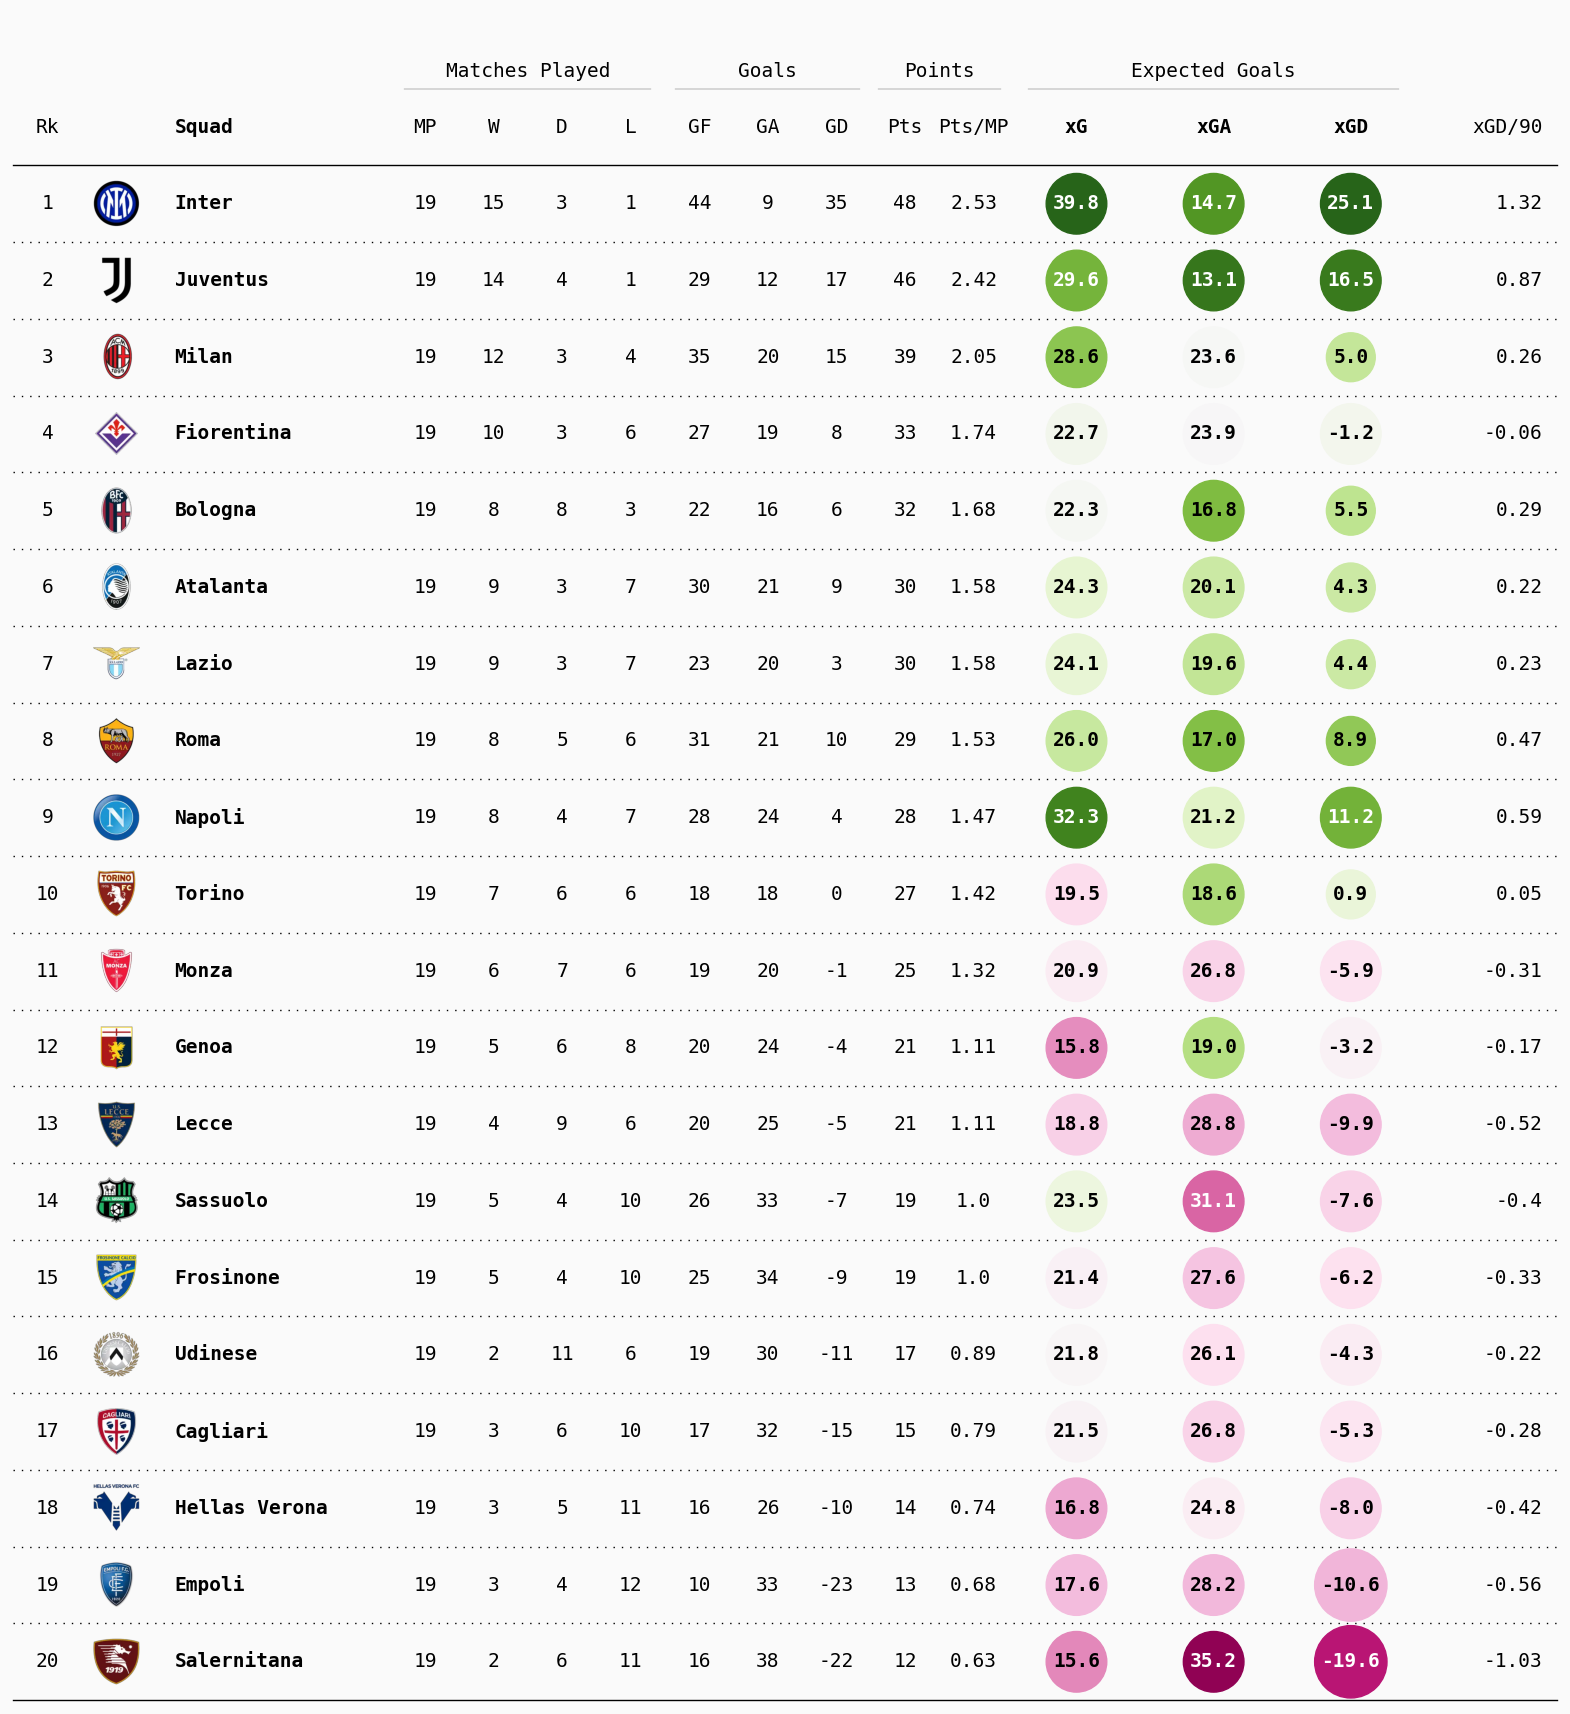

In [7]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    serieA,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# Optional: add colors to the rows

# for idx in [0, 1, 2, 3]:
#     table.rows[idx].set_facecolor(row_colors["top4"])
#
# for idx in [4, 5]:
#     table.rows[idx].set_facecolor(row_colors["top6"])
#
# for idx in [17, 18, 19]:
#     table.rows[idx].set_facecolor(row_colors["relegation"])

In [8]:
fig.savefig("../figures/serieA_2324_MD19.png", facecolor=ax.get_facecolor(), dpi=200, bbox_inches="tight")